In [1]:
import numpy as np
import pandas as pd
import seaborn as sns

import re
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor

from sklearn.metrics import mean_absolute_percentage_error
import matplotlib.pyplot as plt 
from sklearn.metrics import mean_absolute_error, r2_score


In [2]:
df = pd.read_csv("auto-mpg.csv")


In [3]:
df.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
0,18.0,8,307.0,130,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140,3449,10.5,70,1,ford torino


In [4]:
df.columns

Index(['mpg', 'cylinders', 'displacement', 'horsepower', 'weight',
       'acceleration', 'model year', 'origin', 'car name'],
      dtype='object')

In [5]:
df.isnull().sum()

mpg             0
cylinders       0
displacement    0
horsepower      0
weight          0
acceleration    0
model year      0
origin          0
car name        0
dtype: int64

In [6]:
df.describe()

,mpg,cylinders,displacement,weight,acceleration,model year,origin
count,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000
mean,23.514573,5.454774,193.425879,2970.424623,15.568090,76.010050,1.572864
std,7.815984,1.701004,104.269838,846.841774,2.757689,3.697627,0.802055
min,9.000000,3.000000,68.000000,1613.000000,8.000000,70.000000,1.000000
25%,17.500000,4.000000,104.250000,2223.750000,13.825000,73.000000,1.000000
50%,23.000000,4.000000,148.500000,2803.500000,15.500000,76.000000,1.000000
75%,29.000000,8.000000,262.000000,3608.000000,17.175000,79.000000,2.000000
max,46.600000,8.000000,455.000000,5140.000000,24.800000,82.000000,3.000000


C:\Users\sanje\AppData\Local\Temp\ipykernel_6152\2934165244.py:4: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr=df.corr()


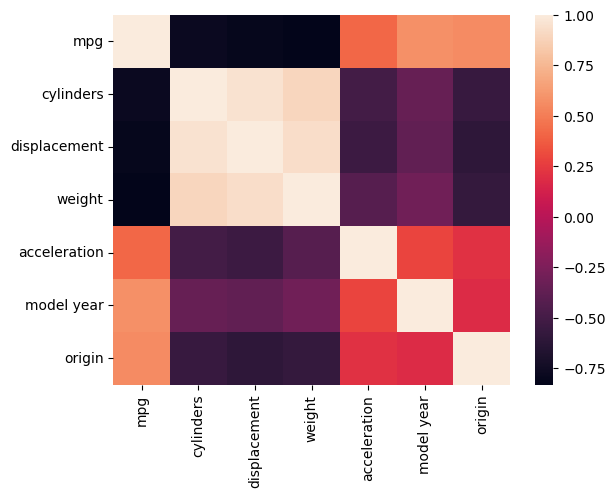

In [7]:
import seaborn as sns
import matplotlib.pyplot as plt

corr=df.corr()
sns.heatmap(corr)
plt.show()

<Axes: >

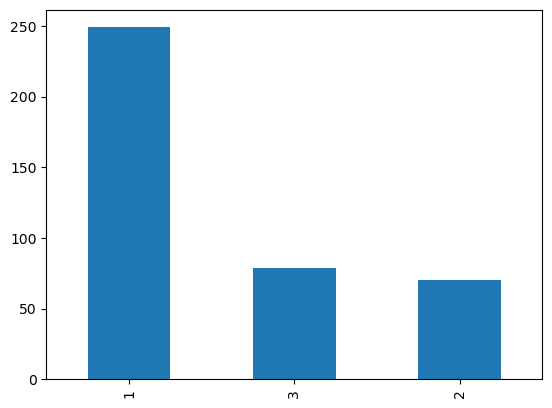

In [8]:
pd.value_counts(df['origin']).plot.bar()

<Axes: >

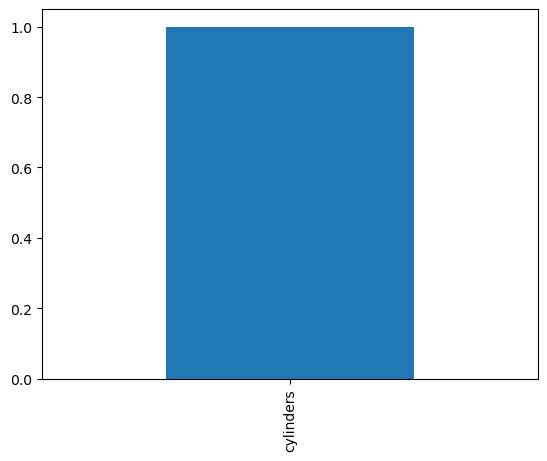

In [9]:
pd.value_counts(['cylinders']).plot.bar()

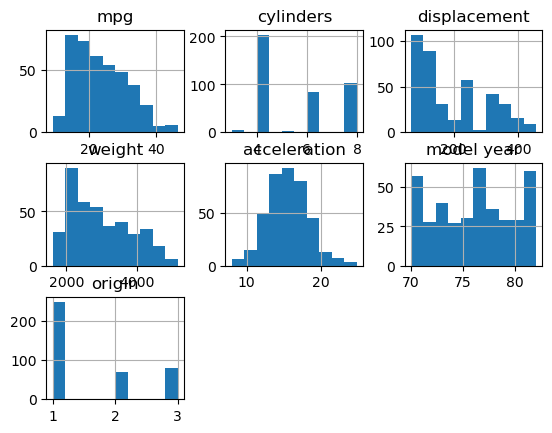

In [10]:
df.hist()
plt.show()

In [11]:
df = df.drop(["car name"] , axis=1)
df.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin
0,18.0,8,307.0,130,3504,12.0,70,1
1,15.0,8,350.0,165,3693,11.5,70,1
2,18.0,8,318.0,150,3436,11.0,70,1
3,16.0,8,304.0,150,3433,12.0,70,1
4,17.0,8,302.0,140,3449,10.5,70,1


In [12]:
print(df.shape)
print(df.size)

(398, 8)
3184


In [13]:
x = df.drop("mpg",axis=1)
y = df["mpg"]

In [14]:
x.head()

,cylinders,displacement,horsepower,weight,acceleration,model year,origin
0,8,307.0,130,3504,12.0,70,1
1,8,350.0,165,3693,11.5,70,1
2,8,318.0,150,3436,11.0,70,1
3,8,304.0,150,3433,12.0,70,1
4,8,302.0,140,3449,10.5,70,1


In [15]:
x.dtypes

cylinders         int64
displacement    float64
horsepower       object
weight            int64
acceleration    float64
model year        int64
origin            int64
dtype: object

In [16]:
# for row in x["horsepower"]:
#   if type(row)==int:
#       pass
#   else:
#       print(row,type(row))


In [17]:
for i in range(len(x["horsepower"])):
    if x["horsepower"][i]=="?":
        x["horsepower"][i]=0
    else:
        x["horsepower"][i]=int(x["horsepower"][i])

C:\Users\sanje\AppData\Local\Temp\ipykernel_6152\1915164626.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  x["horsepower"][i]=int(x["horsepower"][i])
C:\Users\sanje\AppData\Local\Temp\ipykernel_6152\1915164626.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  x["horsepower"][i]=0


In [18]:
y.head()

0    18.0
1    15.0
2    18.0
3    16.0
4    17.0
Name: mpg, dtype: float64

In [19]:
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=1)

In [20]:
print(x_train.shape)
print(x_test.shape)

(298, 7)
(100, 7)


In [21]:
print(y_train.shape)
print(y_test.shape)

(298,)
(100,)


In [22]:
tree_model = DecisionTreeRegressor()
tree_model.fit(x_train,y_train)
tree_r2=tree_model.score(x_test,y_test)

In [23]:
model = RandomForestRegressor()
model.fit(x_train,y_train)
pred = model.predict(x_test)

In [24]:
meap = mean_absolute_percentage_error(y_test,pred)
print(meap)

0.07556087344499324


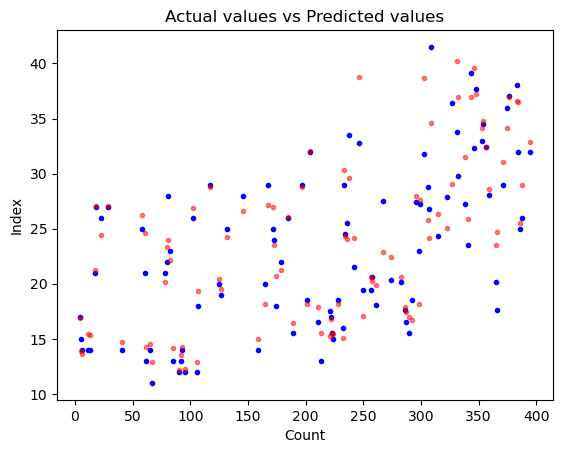

In [25]:
plt.scatter(x_test.index,y_test,marker=".",color="blue")
plt.scatter(x_test.index,pred,marker=".",color="red",alpha=0.5)
plt.title("Actual values vs Predicted values")
plt.xlabel("Count")
plt.ylabel("Index")
plt.show()

In [26]:
mea = mean_absolute_error(y_test,pred)
mape = mean_absolute_percentage_error(y_test,pred)
r2 = r2_score(y_test,pred)
print(f"""
Mean absolute error:{mea}
Mean absolute percentage error:{mape}
Decision Tree R2 core:{tree_r2}
Random Forest R2 score:{r2}
""")


Mean absolute error:1.7887600000000008
Mean absolute percentage error:0.07556087344499324
Decision Tree R2 core:0.7423195649595573
Random Forest R2 score:0.8768916829963462

